# Braintracer Analysis
Braintracer extends the functionality of cellfinder and brainreg. It takes the downsampled data, registered atlas, and positive cell coordinates, scales them down to downsampled space and assigns them to corresponding atlas brain areas, cleanly displaying the results from multiple datasets.

In [1]:
import braintracer.file_management as btf
import braintracer.analysis as bt
import braintracer.plotting as btp
import matplotlib.pyplot as plt

In [2]:
bt.Dataset('FR199', 'LV', (5046, 3847, 2776), display_validation=False)
bt.Dataset('FR200', 'LS', (5046, 3847, 2776), display_validation=False);

In [3]:
bt.run_analysis(debug=True)

FR199: 319 cells in FR199 inferior olive, out of 5420 total. 97.7% cells in non-tract and non-ventricular areas
FR200: 858 cells in FR200 inferior olive, out of 3568 total. 98.2% cells in non-tract and non-ventricular areas


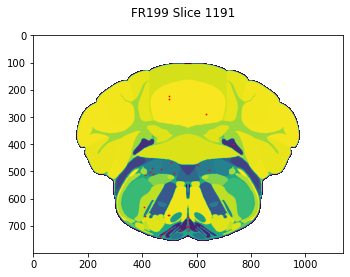

In [4]:
bt.datasets[0].show_coronal_section(142, 2774)

In [5]:
for dataset in bt.datasets:
    _, _, cb_cells = bt.get_area_info('Cerebellar nuclei', dataset.propagated_cell_counter)
    _, _, io_cells = bt.get_area_info('Inferior olivary complex', dataset.propagated_cell_counter)
    print('Group: '+dataset.group+'. Cells in CbN: '+str(cb_cells)+'. Cells in IO: '+str(io_cells))

Group: LV. Cells in CbN: [132]. Cells in IO: [319]
Group: LS. Cells in CbN: [13]. Cells in IO: [858]


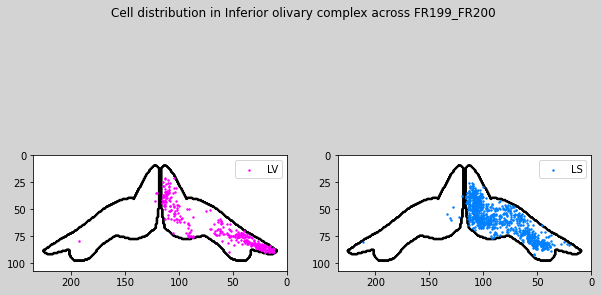

In [6]:
btp.generate_projection_plot('Inferior olivary complex')
#btf.save(f'IO_{title}_new', as_type='pdf')

In [7]:
grouped = False
title = '_'.join([i.name for i in bt.datasets])

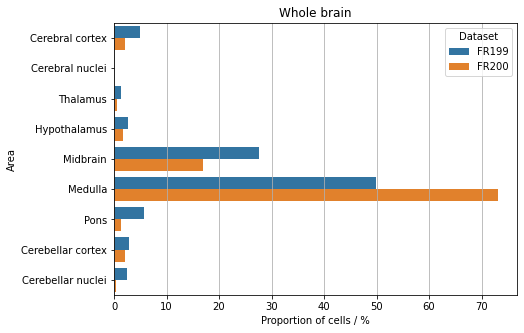

In [8]:
f, ax = plt.subplots(figsize=(8,5))
f.subplots_adjust(left=0.2)
btp.generate_summary_plot(ax, bt.results.summary_cells, grouped=grouped)
btf.save(f'summary_{title}', as_type='pdf')

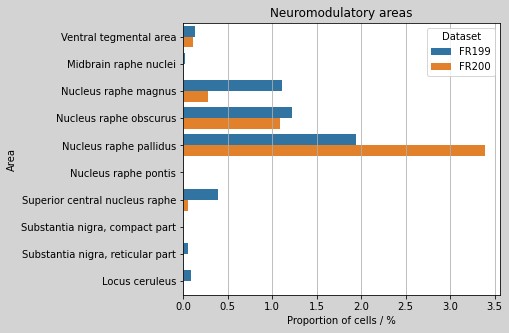

In [9]:
f, ax = plt.subplots(figsize=(8,5))
f.set_facecolor('lightgrey')
f.subplots_adjust(left=0.35)
btp.generate_custom_plot(ax, bt.results.nrmdltn_cells, bt.nrmdltn_names, title='Neuromodulatory areas', grouped=grouped)
btf.save(f'neuromodulation_{title}', as_type='pdf')

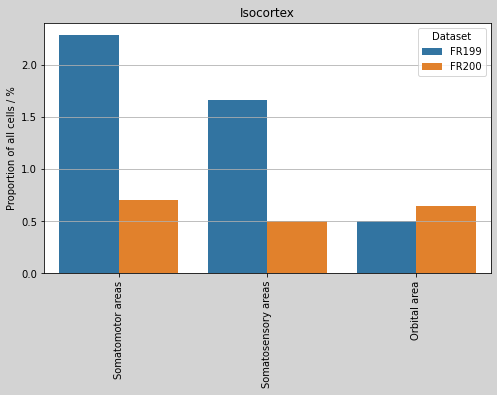

In [10]:
f, ax = plt.subplots(figsize=(8,6))
f.set_facecolor('lightgrey')
f.subplots_adjust(bottom=0.3)
btp.generate_zoom_plot(ax, 'Isocortex', grouped=grouped, depth=1, threshold=0.1)
btf.save(f'isocortex_zoom_{title}', as_type='pdf')

C:\Users\sclot\anaconda3\lib\site-packages\braintracer\plotting.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')


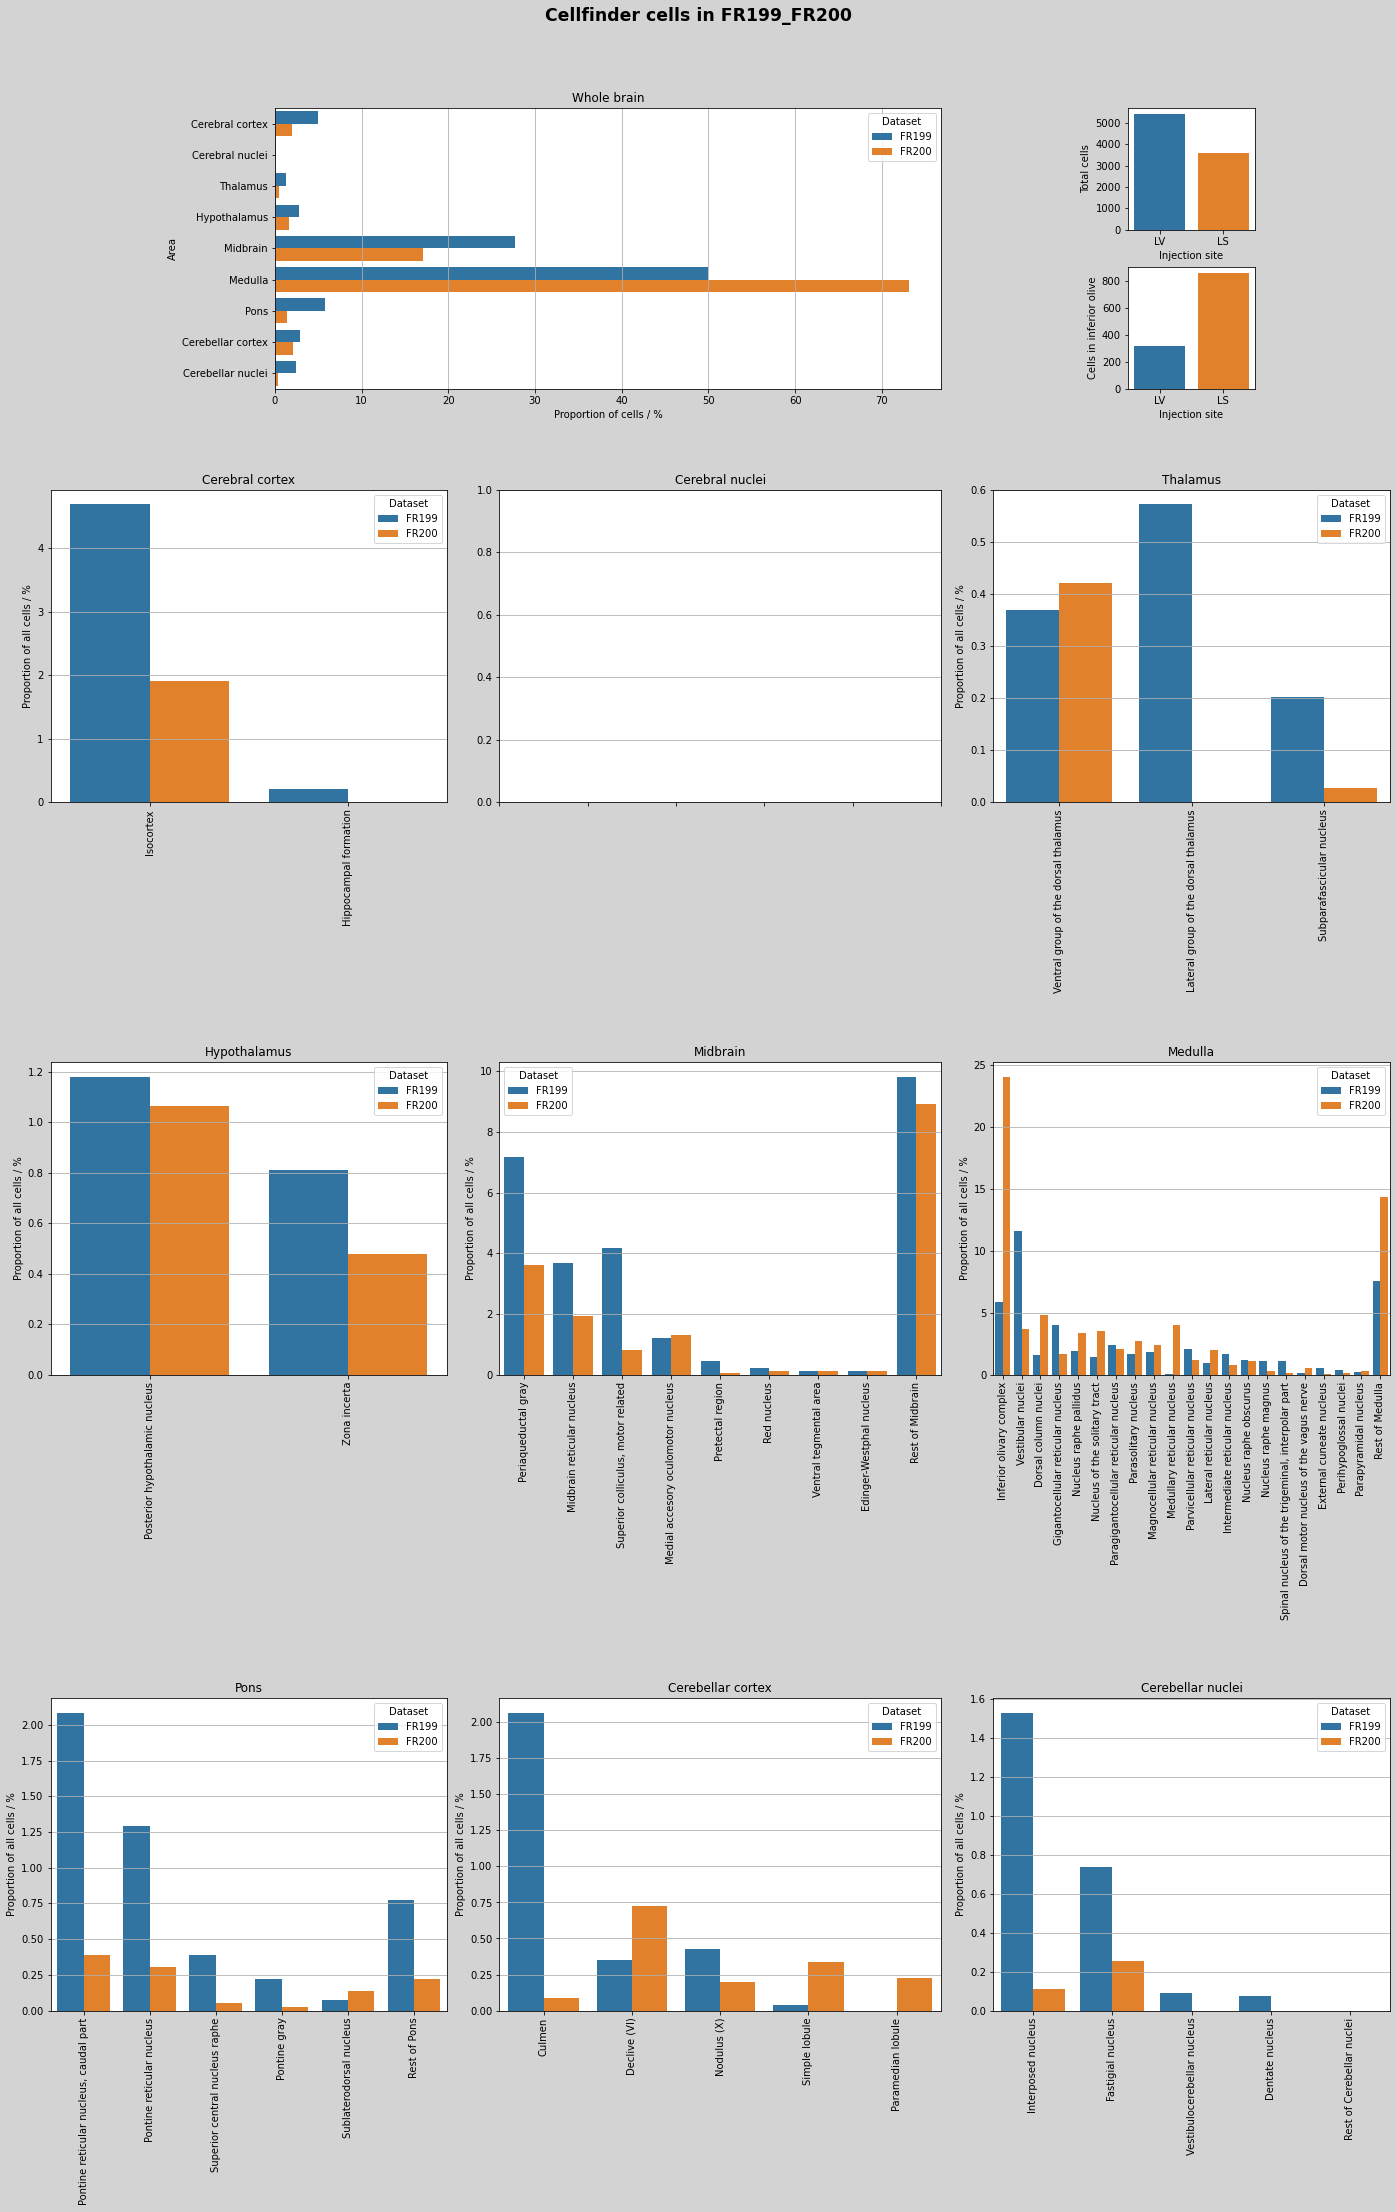

In [11]:
f = plt.figure(figsize=(24, 35))
gs = f.add_gridspec(60, 30)
f.suptitle(f'Cellfinder cells in {title}', y=0.92, size='xx-large', weight='bold')
f.set_facecolor('lightgrey')
ax1 = f.add_subplot(gs[0:9, 5:20])
ax_totals = f.add_subplot(gs[0:4, 24:27])
ax_io = f.add_subplot(gs[5:9, 24:27])
ax2, ax3, ax4 = f.add_subplot(gs[12:22, 0:9]), f.add_subplot(gs[12:22, 10:20]), f.add_subplot(gs[12:22, 21:30])
ax5, ax6, ax7 = f.add_subplot(gs[30:40, 0:9]), f.add_subplot(gs[30:40, 10:20]), f.add_subplot(gs[30:40, 21:30])
ax8, ax9, ax10 = f.add_subplot(gs[50:60, 0:9]), f.add_subplot(gs[50:60, 10:20]), f.add_subplot(gs[50:60, 21:30])
axes = [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

import seaborn as sns
import pandas as pd
from itertools import chain
cells = [i.get_total_cells() for i in bt.datasets]
names = [i.group for i in bt.datasets]
titles = ['Injection site', 'Total cells']
df = pd.DataFrame(zip(names, cells), columns=titles)
if grouped:
    sns.barplot(x=titles[0], y=titles[1], order=['LV','LS'], ax=ax_totals, data=df, ci=None)
    sns.stripplot(x=titles[0], y=titles[1], order=['LV','LS'], dodge=True, edgecolor='w', linewidth=0.5, ax=ax_totals, data=df)
else:
    sns.barplot(x=titles[0], y=titles[1], ax=ax_totals, data=df, ci=None)

io_cells = [bt.get_area_info(['IO'], i.propagated_cell_counter, bt.area_indexes)[-1] for i in bt.datasets]
io_cells = io_cells[0] if len(io_cells) == 1 else chain.from_iterable(io_cells)
io_titles = ['Injection site', 'Cells in inferior olive']
io_df = pd.DataFrame(zip(names, io_cells), columns=io_titles)
if grouped:
    sns.barplot(x=io_titles[0], y=io_titles[1], order=['LV','LS'], ax=ax_io, data=io_df, ci=None)
    sns.stripplot(x=io_titles[0], y=io_titles[1], order=['LV','LS'], dodge=True, edgecolor='w', linewidth=0.5, ax=ax_io, data=io_df)
else:
    sns.barplot(x=io_titles[0], y=io_titles[1], ax=ax_io, data=io_df, ci=None)

btp.generate_summary_plot(ax1, bt.results.summary_cells, grouped=False)
for idx, ax in enumerate(axes[:-1]):
    btp.generate_zoom_plot(ax, bt.summary_names[idx], grouped=False, threshold=0.1)
btp.generate_zoom_plot(ax10, bt.summary_names[-1], grouped=False, depth=1, threshold=0)

btf.save(f'areas_overview_{title}_ungrouped', as_type='pdf')